In [26]:
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d

In [29]:
X=[]
Y=[]
for nclass in range(1,9):
    my_data = np.genfromtxt('Figure06_class{}.csv'.format(nclass), delimiter=',')
    npoints=int(my_data.shape[0]/3)
    ncols=int(my_data.size/3/npoints)
    curves=np.reshape(my_data,[npoints,3,ncols])
    X.append(xr.DataArray(data=curves[:,:,0],dims=['n','curve'],coords={'curve':['mean','mean-std','mean+std'],'nclass':nclass,'n':np.arange(0,npoints)}))
    Y.append(xr.DataArray(data=curves[:,:,1],dims=['n','curve'],coords={'curve':['mean','mean-std','mean+std'],'nclass':nclass,'n':np.arange(0,npoints)}))
X=xr.concat(X,'nclass')
Y=xr.concat(Y,'nclass')

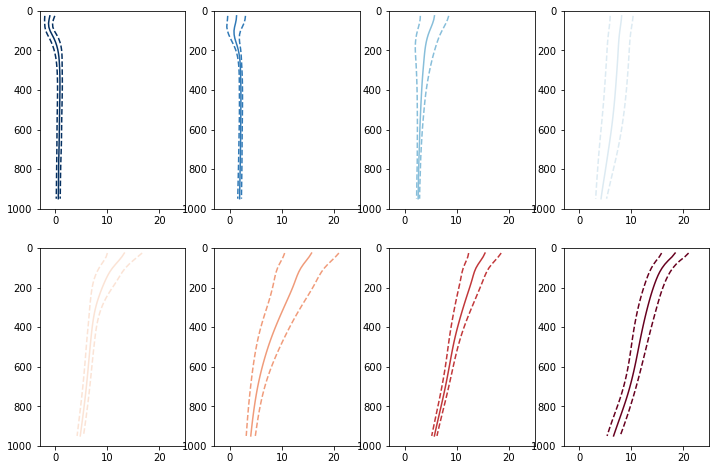

In [112]:
ls=['-','--','--']
cmap=plt.get_cmap('RdBu_r',8)
plt.figure(figsize=[12,8])
for nclass in range(0,8):
    ax=plt.subplot(2,4,nclass+1)
    for curve in range(0,3):
        y=data['Temperature'].isel(curve=curve,nclass=nclass)
        x=data['Pressure'].isel(curve=curve,nclass=nclass)
        cubic = interp1d(x.dropna('n'), y.dropna('n'),kind='cubic')
        XX=np.linspace(25,950,50)
        YY=cubic(XX)
        plt.plot(YY,XX,linestyle=ls[curve],color=cmap(nclass),axes=ax)
    ax.set_ylim([1000,0])
    ax.set_xlim([-3,25])

In [106]:
x.dropna('n')

<xarray.DataArray 'Pressure' (n: 13)>
array([978.94464187, 901.99152684, 789.93699091, 676.53240033,
       559.0776458 , 456.47349242, 370.06999484, 295.8169891 ,
       237.76463916, 160.81152413,  94.65884629,  51.4570975 ,
        22.43092253])
Coordinates:
  * n        (n) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    curve    <U8 'mean+std'
    nclass   int64 5
Attributes:
    units:    db

ValueError: y must be one of None, 'curve', 'n', 'nclass'

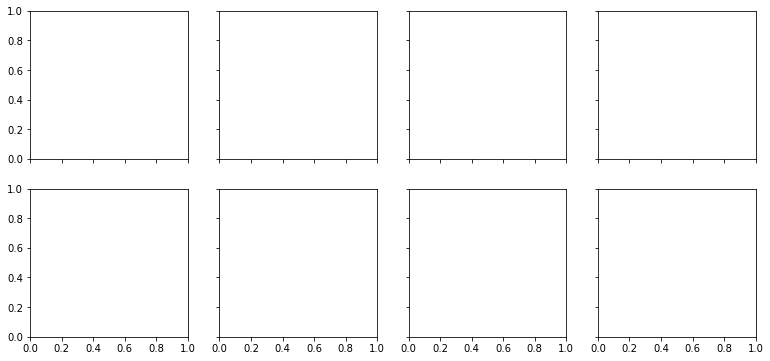

In [62]:
data['Temperature'].isel(curve=0).plot(y='Pressure',col='nclass',col_wrap=4,linestyle='-',marker='',yincrease=False)

(1000.0, 0.0)

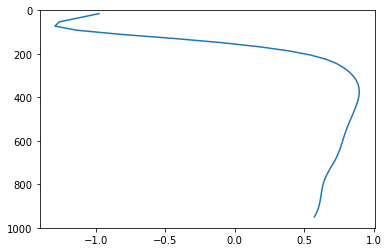

In [98]:
#from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
y=data['Temperature'].isel(curve=0,nclass=0)
x=data['Pressure'].isel(curve=0,nclass=0)
#spline = make_interp_spline(x.dropna('n'), y.dropna('n'))
cubic = interp1d(x.dropna('n'), y.dropna('n'),kind='cubic')
XX=np.linspace(15,950,50)
YY=cubic(XX)
plt.plot(YY,XX)
#plt.plot(data['Temperature'].isel(curve=1,nclass=0),data['Pressure'].isel(curve=1,nclass=0),'--')
#plt.plot(data['Temperature'].isel(curve=2,nclass=0),data['Pressure'].isel(curve=2,nclass=0),'--')
plt.ylim([1000,0])

In [90]:
x.dropna('n')

<xarray.DataArray 'Pressure' (n: 14)>
array([977.60663812, 894.53289796, 774.75215632, 679.12075776,
       558.3740424 , 453.08290661, 350.68969199, 263.75205693,
       194.20194888, 129.48170945, 100.50249776,  70.55731235,
        42.54407439,  14.53083643])
Coordinates:
  * n        (n) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
    curve    <U8 'mean'
    nclass   int64 1
Attributes:
    units:    db

(1000.0, 0.0)

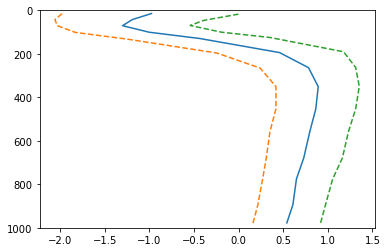

In [69]:
plt.plot(data['Temperature'].isel(curve=0,nclass=0),data['Pressure'].isel(curve=0,nclass=0))
plt.plot(data['Temperature'].isel(curve=1,nclass=0),data['Pressure'].isel(curve=1,nclass=0),'--')
plt.plot(data['Temperature'].isel(curve=2,nclass=0),data['Pressure'].isel(curve=2,nclass=0),'--')
plt.ylim([1000,0])